In [99]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training_143373.jpg")


In [3]:
if img_array is None:
    print("Error: Could not read image.")
else:
    # Image was read successfully, proceed with processing
    print("Image read successfully.")


Image read successfully.


In [4]:
img_array.shape


(48, 48, 3)

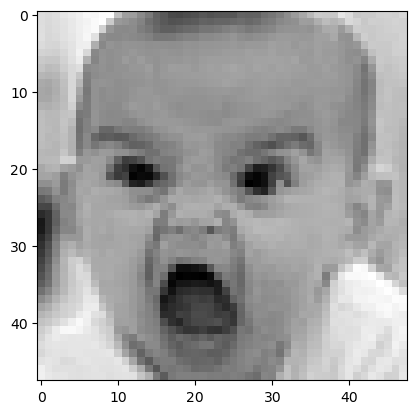

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = r"C:\Users\hp\Downloads\Training"

In [7]:
os.startfile(Datadirectory)


In [8]:
classes = ["0", "1", "2", "3", "4", "5", "6"]

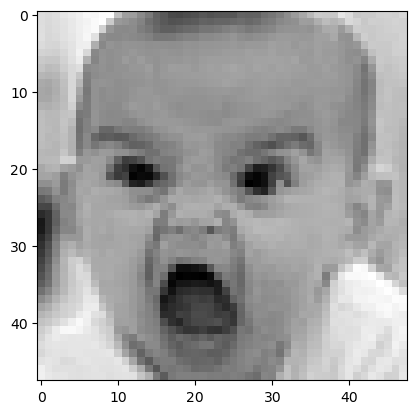

In [9]:
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break



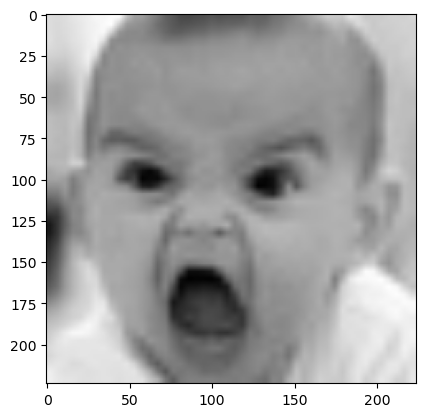

In [10]:
img_size= 224
new_array= cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
##read all the images and convertin them to array

In [13]:
training_Data = []
def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [14]:
create_training_Data()

In [15]:
print(len(training_Data))

55


In [16]:
import random
random.shuffle(training_Data)

In [17]:
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size,3)

In [18]:
X.shape

(55, 224, 224, 3)

In [19]:
# normalize the data
X= X/255.0;

In [20]:
y[0]

2

In [21]:
Y = np.array(y)

In [22]:
Y.shape

(55,)

In [23]:
# DEEp Learing model for training 

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
model = tf.keras.applications.MobileNetV2()

In [26]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [27]:
# Transfer Learning

In [28]:
base_input = model.layers[0].input  ##input

In [29]:
base_output = model.layers[-2].output

In [30]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [31]:
final_output = layers.Dense(128)(base_output)  ##adding new laye after the output
final_output = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)  ## my class are 7

In [32]:
final_output  ## output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [33]:

base_input = model.input


In [34]:
new_model = keras.Model(inputs=base_input, outputs=final_output)



In [35]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [73]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [75]:
new_model.fit(X, Y, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.1144 - loss: 2.0176 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7695 - loss: 1.0595
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 9s/step - accuracy: 0.9775 - loss: 0.4637
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 11s/step - accuracy: 1.0000 - loss: 0.1816
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 1.0000 - loss: 0.0383
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 1.0000 - loss: 0.0149
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 11s/step - accuracy: 1.0000 - loss: 0.0078
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 10s/step - accuracy: 0.9879 - loss: 0.0480
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 11s/step - accuracy: 1.0000 - loss: 0.0021
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 10s/step - accuracy: 1.0000 - loss: 0.0080
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 10s/step - accuracy: 1.0000 - loss: 0.0223
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 10s/step - accuracy: 1.0000 - loss: 0.0171
Epoch

In [77]:
new_model.save('Final_model_95p07.h5')

In [81]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [83]:
new_model.evaluate

<bound method TensorFlowTrainer.evaluate of <Functional name=functional, built=True>>

In [143]:
frame = cv2.imread("Training_87867.jpg")

In [145]:
frame.shape

(48, 48, 3)

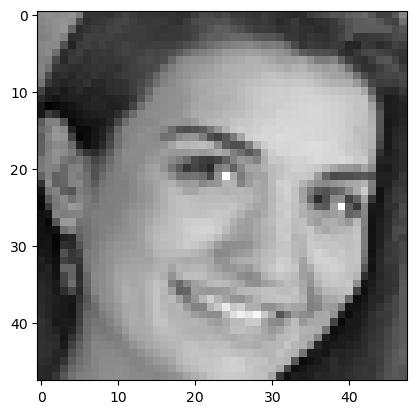

In [147]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [149]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [151]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [153]:
gray.shape

(48, 48)

In [155]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) ==0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew]

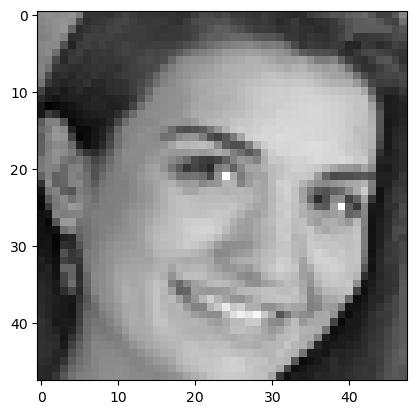

In [157]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

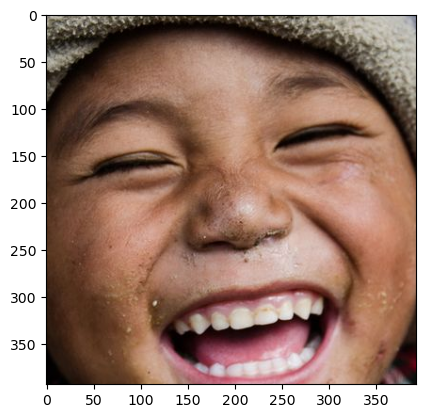

In [159]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [161]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis =0)  ##need 
final_image = final_image/255.0

In [163]:
Predictions  =new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


In [165]:
Predictions[0]

array([1.3328052e-11, 8.5888035e-13, 6.2339147e-08, 8.2111956e-07,
       1.0001031e-09, 1.9805792e-10, 9.9999905e-01], dtype=float32)

In [167]:
np.argmax(Predictions)

6

## End